In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
full_data = pd.read_csv('/content/USA_Housing.csv')

In [4]:
print("train data:", full_data.shape)

train data: (5000, 7)


In [9]:
full_data.head(7)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."


In [12]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


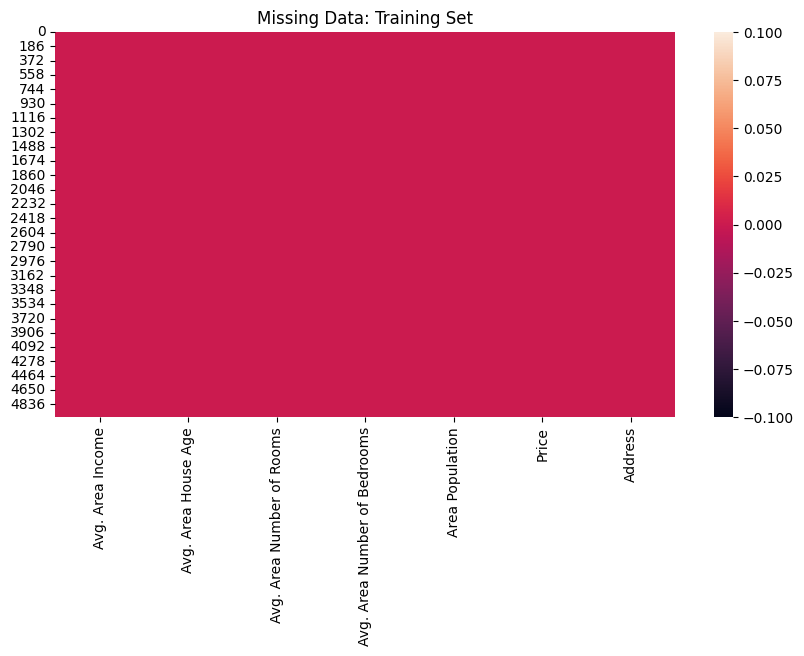

In [14]:
# Heatmap
sns.heatmap(full_data.isnull())
plt.title('Missing Data: Training Set')
plt.show()

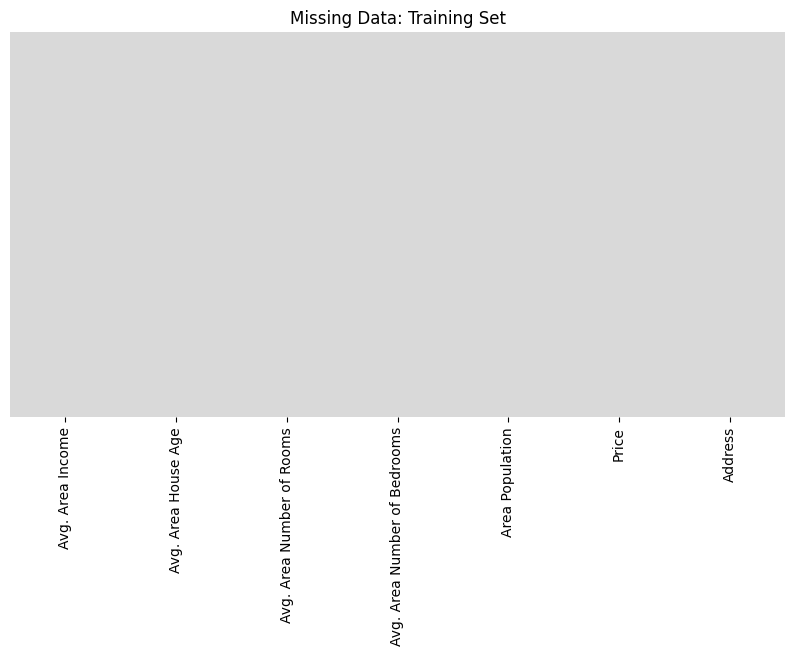

In [19]:
# Heatmap
sns.heatmap(full_data.isnull(),yticklabels = False,cbar=False, cmap="tab20c_r")
plt.title('Missing Data: Training Set')
plt.show()

In [20]:
missing_values_per_column = full_data.isnull().sum()
print(missing_values_per_column)

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [21]:
missing_values_per_row = full_data.isnull().sum()
print(missing_values_per_row)

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [22]:
rows_with_missing_data = full_data[full_data.isnull().any(axis=1)]
print(rows_with_missing_data)

Empty DataFrame
Columns: [Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, Avg. Area Number of Bedrooms, Area Population, Price, Address]
Index: []


In [23]:
column_with_missing_data = full_data[full_data.isnull().any(axis=1)]
print(column_with_missing_data)

Empty DataFrame
Columns: [Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, Avg. Area Number of Bedrooms, Area Population, Price, Address]
Index: []


In [28]:
full_data.drop("Address", axis=1, inplace= True)

In [30]:
full_data.head(7)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06


In [31]:
full_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [33]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Price', axis = 1) # grabs everything else but 'Price'

# Create target variable
y = full_data['Price'] # y is the column we're trying to predict

In [34]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [35]:
x_transform

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [37]:
y.shape
x.shape

(5000, 5)